<a href="https://colab.research.google.com/github/mohamedjihedriahi/Optimization-projects-demo-/blob/main/Optimization_Logistic_regression_from_scratch_(demo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv

In [ ]:
df = pd.read_csv('TelcoChurn.csv')

In [ ]:
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0


#II/ lire les données

## Question1

In [ ]:
df['churn'] = df['churn'].astype(int)

In [ ]:
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


## Question 2

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   200 non-null    float64
 1   age      200 non-null    float64
 2   address  200 non-null    float64
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    float64
 6   equip    200 non-null    float64
 7   churn    200 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
df.shape

(200, 8)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.describe()

,tenure,age,address,income,ed,employ,equip,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000


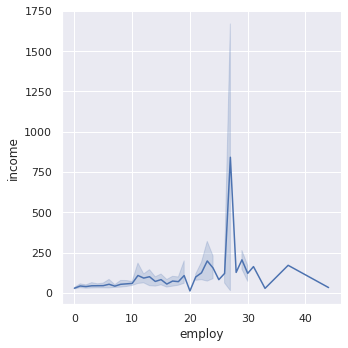

In [ ]:
sns.relplot(data=df, x="employ", y="income", kind="line")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


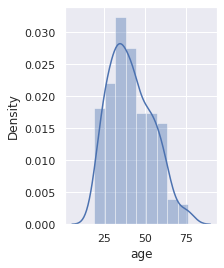

In [ ]:
# Affichage graphique de la variable Age
plt.subplot(122)
sns.distplot(df['age'])

plt.show();

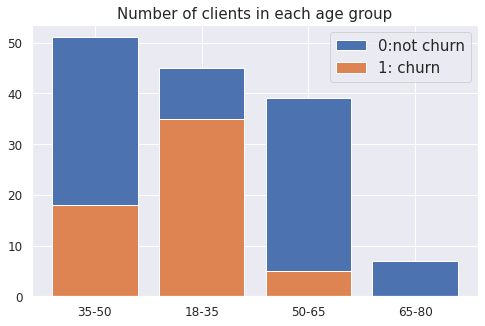

In [ ]:
df1=df
#Relation entre les tranches d age  et Default_Payment 
bins = [18,35,50,65,80]
names = ['18-35','35-50','50-65','65-80']
df['age_bin'] = pd.cut(x=df1['age'], bins=bins, labels=names, right=True)

age_cnt = df1['age_bin'].value_counts()
age_0 = (df1.age_bin[df1['churn'] == 0].value_counts())
age_1 = (df1.age_bin[df1['churn'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0:not churn')
plt.bar(age_1.index, age_1.values, label='1: churn')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

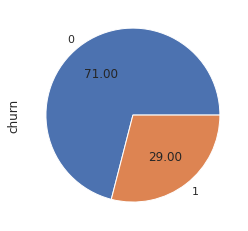

In [ ]:
df1['churn'].replace({1:'1', 0:'0'}).value_counts().plot(kind='pie',autopct='%.2f') 

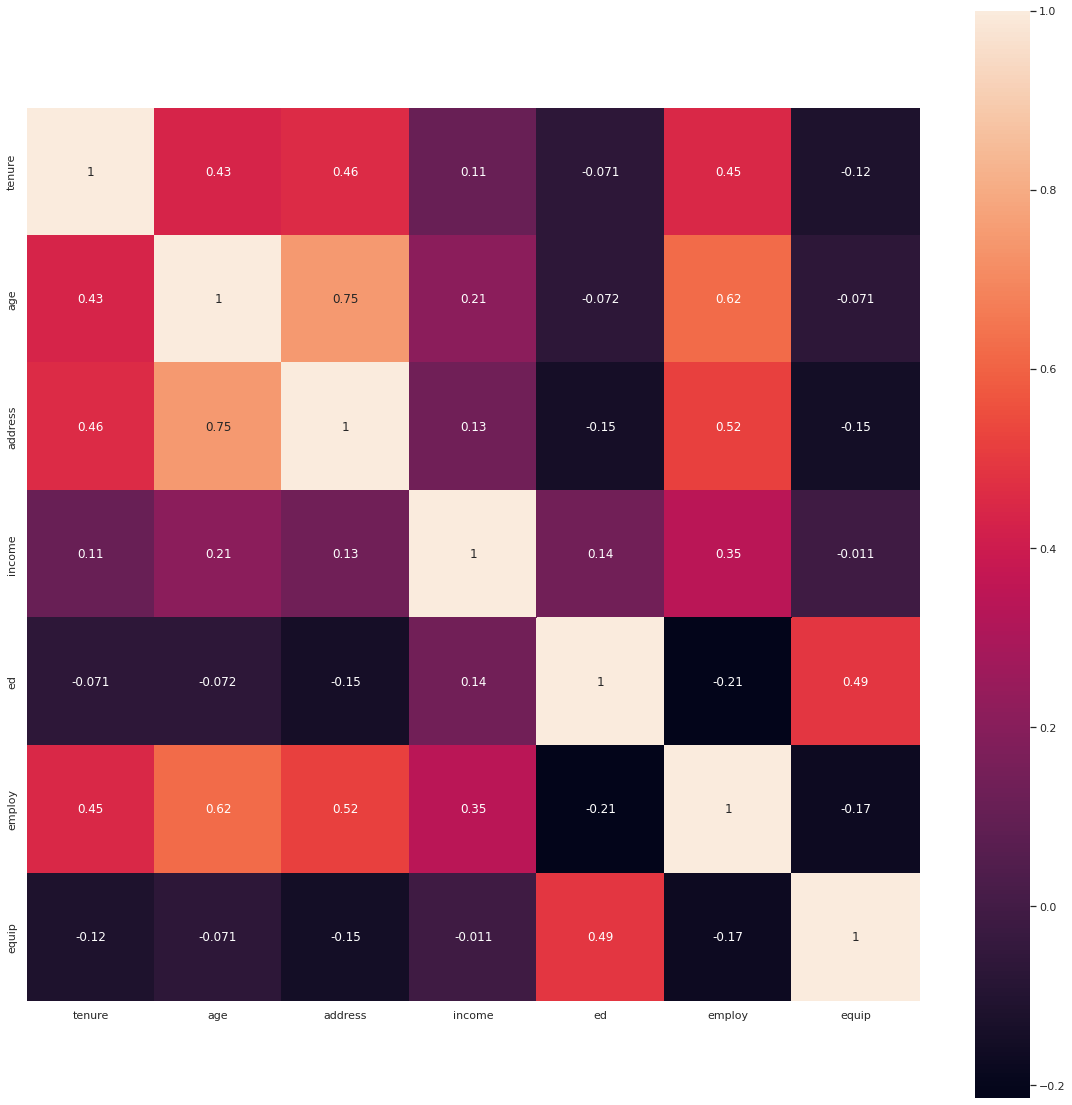

In [ ]:
plt.figure(figsize=(20,20))
heat = sns.heatmap(df1[['tenure',	'age','address','income','ed','employ','equip']].corr(), vmax=1, square=True, annot=True)

#III Regression logistique

#III/1 Implementation
#**III**/1.1 Fonction Sigmoide

##Question 3 : La fonction z → log (1 − g(z)) est-elle convexe ?

Déclare fonction g(z):

In [ ]:
g = lambda z : 1 / ( 1 + np.exp(-z) )

In [ ]:
def sigmoid(z):
 return (1/(1+np.exp(-z)))

In [ ]:
z = np.linspace(-10, 10, 100)

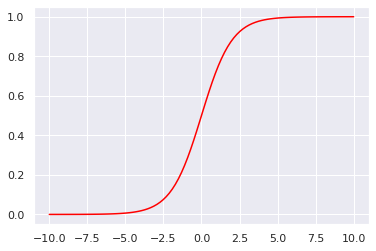

In [ ]:
plt.plot(z, g(z), color='red')

On interprete graphiquement que la fonction z → log (1 − g(z)) est une fonction est NON-convex.

OU:


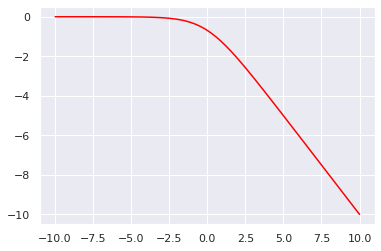

In [ ]:
plt.plot(z, np.log(1-g(z)), color='red')

->g(z) = 1 / (1 + exp(-z))

log(1 - g(z)) = log(1 - (1 / (1 + exp(-z)))) = X

X  = log(1) + log(1 + exp(-z))

X  = log(1) + log(exp(-z)) = log(exp(-z)) = -z

X' = -1

X'' =  0

   Et on sait que:La fonction f est concave sur I si sa dérivée f ' est décroissante sur I, soit f ''(x) ≤ 0 pour tout x de I. or, log(1-g(z))' = cte = -1 et log(1-g(z))'' = 0 => N'est pas convexe.

##Question 4

*)Valeurs Critiques de la fonction sigmoid(x) ou g: 

In [ ]:
g(0)

0.5

In [ ]:
g(1)

0.7310585786300049

In [ ]:
g(100000)

1.0

In [ ]:
g(-100000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


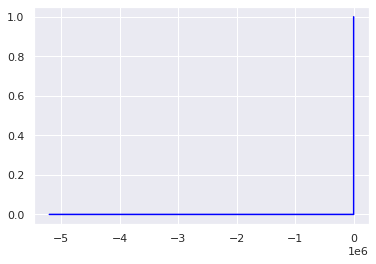

In [ ]:
z = np.linspace(-5200000, 10, 1000000)

result = g(z)
plt.plot(z, result, color='blue')

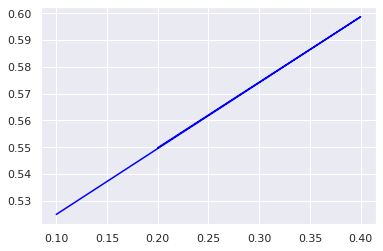

In [ ]:
from numpy import array, exp

z = array([ 0.2, 0.4, 0.1])

result = g(z)
plt.plot(z, result, color='blue')

Automatiquement:

In [ ]:
def sigmoid1(z):
    # Convertir l'input à input array
    z = np.array(z)
    # Retourner ces variables corréctement:
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))   
    return g

In [ ]:
print('Test sur ZERO:  = ', sigmoid1(0))
print('Test sur une grande valeur positive:  = ', sigmoid1(1000))
print('Test sur une grande valeur negative: = ', sigmoid1(-1000))
liste = [1,5,15,50,100] 
vecteur = np.array(liste)
print('Test sur les vecteurs:',sigmoid(vecteur),'\n')
B = np.array([[0.5, 0.9], [0.6, 0.9], [0.2, .006]])
print('Test sur les matrices:',sigmoid(B),'\n')

Test sur ZERO:  =  0.5
Test sur une grande valeur positive:  =  1.0
Test sur une grande valeur negative: =  0.0
Test sur les vecteurs: [0.73105858 0.99330715 0.99999969 1.         1.        ] 

Test sur les matrices: [[0.62245933 0.7109495 ]
 [0.64565631 0.7109495 ]
 [0.549834   0.5015    ]] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


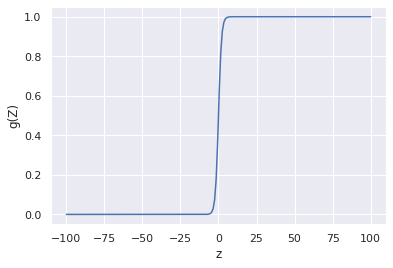

In [ ]:
z = np.linspace(-100, 100, 200)
g = sigmoid1(z)
plt.plot(z,g)
plt.xlabel("z")
plt.ylabel("g(Z)") 
plt.show()

#III/1.2 Fonction coût et gradient

prepare the data for our model

“m” is the number of rows in the dataset.

In [ ]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = df['churn']

In [ ]:
import numpy as np
m = X.shape[0]
a = np.ones((m, 1))
X.insert(loc = 0, column = 'Ones', value = a)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

We will define some functions that will be used to compute the cost.

In [ ]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [ ]:
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

In [ ]:
def cost_function(x, y,theta):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

In [ ]:
def cost_function2(X, y, theta, m):
  y = y.reshape(y.shape[0], 1)
  H = h(theta, X)
  return (sum((y)*np.log(H) + (1-y)*np.log(1-H))) / (-m)

In [ ]:
def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [ ]:
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

##Question 5

Expression de la fonction de coût dans la régression logistique:

Redefining functions:

In [ ]:
g = lambda z : 1 / ( 1 + np.exp(-z) )

w=2
b=3

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
def h(theta, X):
 return sigmoid(np.matmul(X, theta))

In [ ]:
def loss(y, h):
    loss = -np.mean(y*(np.log(h)) - (1-y)*np.log(1-h))
    return loss

In [ ]:
m=25
for i in np.arange(0,m):
  J = lambda θ : (1/m) *  sum(-y[i] * np.log(h[θ](x ** i)) - (1- y ** i) * np.log(1 - h[θ](x ** i)))

##Question 6

In [ ]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
theta_test = np.array([0.4, -0.033, -0.02, 0.003, -0.0002, 0.15, -0.023, 2])

In [ ]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = df['churn']

In [ ]:
import numpy as np
m = X.shape[0]
a = np.ones((m, 1))
X.insert(loc = 0, column = 'Ones', value = a)

Ou

In [ ]:
def costFunction(theta, X, y):
   
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    hyp = sigmoid(np.dot(X, theta)) 
    J =  1/m * np.sum((-y * np.log(hyp)) + (-(1 - y) * np.log(1 - hyp)))
    # Could also be written as 
    # -1/m * np.sum((y * np.log(hyp)) + ((1 - y) * np.log(1 - hyp)))
    # J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))

    grad = 1/m * np.dot(X.T, (hyp - y)) 
    return J, grad

In [ ]:
X= df.iloc[:, 0:7]
y= df.iloc[:, 7]

m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Partie Opérationalle:

In [ ]:
def costFunction(theta, X, y):
   
    # Initialize some useful values
    m = y.size  # number of training examples

    # On doit Retourner ces valeurs correctement:
    J = 0
    grad = np.zeros(theta.shape)
    hyp = sigmoid(np.dot(X, theta)) 
    J =  1/m * np.sum((-y * np.log(hyp)) + (-(1 - y) * np.log(1 - hyp)))

    grad = 1/m * np.dot(X.T, (hyp - y)) 
    return J, grad

In [ ]:
X= df.iloc[:, 0:7] #Puisqu'il y a des 8 valeurs en theta test à considérer
y= df.iloc[:, 7]

m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta_test = np.array([0.4, -0.033, -0.02, 0.003, -0.0002, 0.15, -0.023, 2])
cost, grad = costFunction(theta_test, X, y)

print('La fonction cout est : {:.3f}'.format(cost))
print('et les gradients attendus :')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

La fonction cout est : 0.537
et les gradients attendus :
	[0.124, 4.355, 5.218, 1.350, 9.972, 0.404, 1.322, 0.105]


#III/1.3 Paramètres d’apprentissage à l’aide d’un problème d’optimisation


##Question 7 : La fonction J(θ) est-elle coercive ? Justifiez votre r´eponse.

On a:

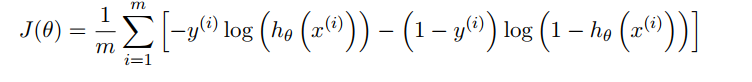

Une fonction réelle est dite coercive si « elle tend vers l'infini à l'infini », éventuellement dans une partie spécifiée de l'ensemble de départ.Dans notre cas:

lm (θ-> +∞) J(θ) = 

lm (θ-> +∞) (1/constante) * Somme(-Yi*log(hθ(Xi)) - (1 - Yi)*log(1 - hθ(Xi)))

Or, hθ(x) = g(θ'T*x), lm (θ-> +∞) g(θ'T*x) -> 1 

D'oû, lm (θ-> +∞) J(θ) -> ∞

**coercive : car limite de norme de z de j tend vers + l'infini**

## Question 8 : Montrez que J(θ) est convexe. Est-elle strictement convexe ?

Il en résultera une fonction de coût non convexe. Mais cela se traduit par une fonction de coût avec des optima locaux, ce qui est un très gros problème pour Gradient Descent pour calculer les optima globaux.

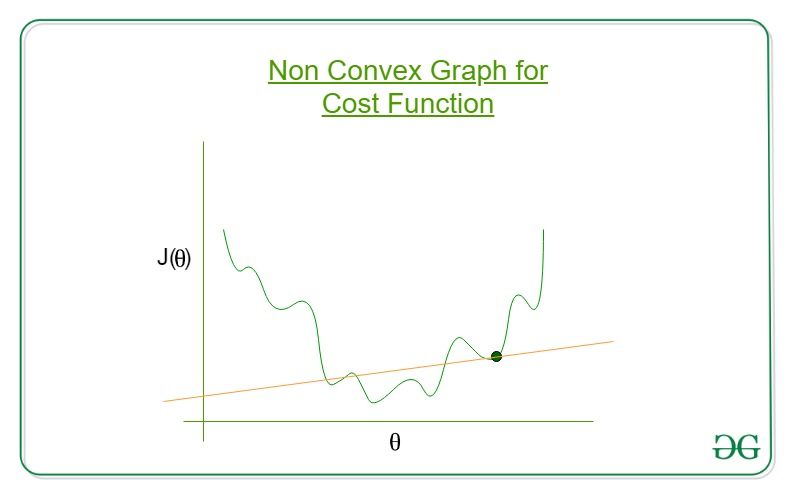


##Question 9 : Montrez que le problème de minimisation admet au moins une solution.

Ainsi, pour la régression logistique, la fonction de coût est

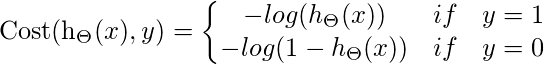

Si y = 0

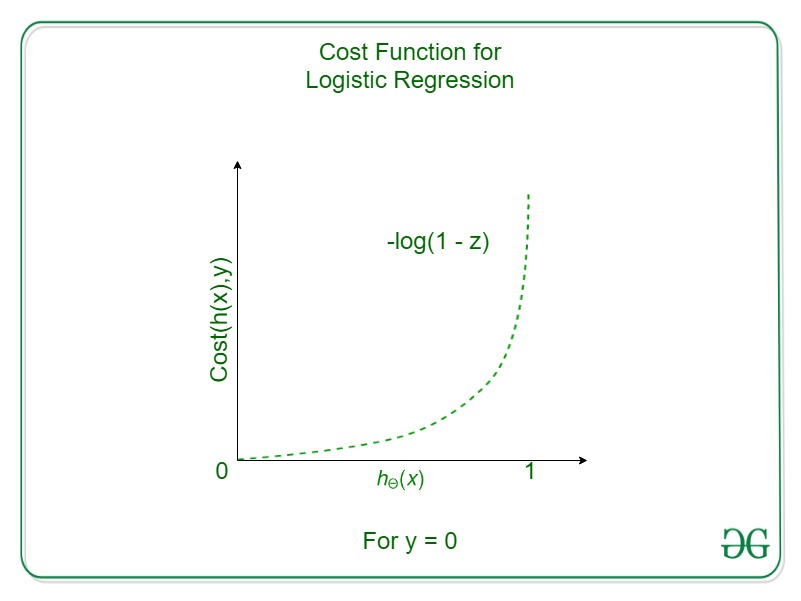

hθ(X) -> 0
Coût -> Infini

Si y = 1

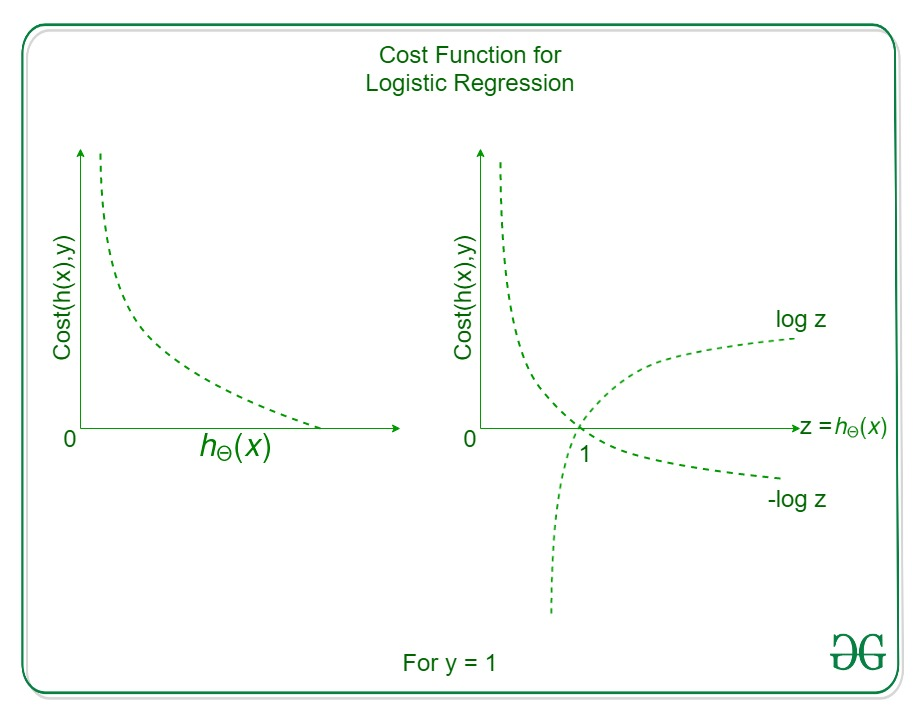

Coût = 0 si y = 1, h θ (x) = 1

Alors,

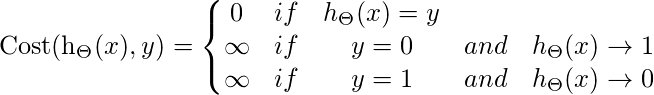

D'oû, le problème de minimisation admet au moins une solution si h θ (x) = y

(Maintenant, vous devriez trouver les paramètres θ ∈ Rn+1 en utilisant des m´ethodes d’optimisation.)

##Question 10 : descent gradient 

In [ ]:
def gradient_descent(theta, X, y, alfa, m):#grad, theta, alpha,numIters
 H = h(theta, X)
 H = H.reshape((H.shape[0],))
 grad = np.subtract(H, y)
 a = np.matmul(np.transpose(X), grad).reshape((theta.shape[0],1))
 
 theta = theta - (alfa/m) * a
 return theta

In [ ]:
def gradient_descent2(grad, theta, alpha, numIters):
    vector = theta
    for _ in range(numIters):
        diff = -alpha * grad(vector)
        vector += diff
    return vector

In [ ]:
def gDescent(grad,theta,alpha,numIters):
    J_vals = []
    
    for i in range(numIters):
        theta = theta - (alpha * grad)
        J_vals.append(cost)
    
    return theta , J_vals
#On aurra le résultat avec ceci.

In [ ]:
#X

## Question 11

In [ ]:
gradient=lambda v: 2 * v
start=0.0
learn_rate=0.2
numIters=20
gradient_descent2(gradient, start, learn_rate, numIters)

0.0

In [ ]:
start=10.0
gradient_descent2(gradient, start, learn_rate, numIters)

0.0003656158440062973

OU:

In [ ]:
X= df.iloc[:, 0:7]
y= df.iloc[:, 7]

m, n = X.shape

X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta_t = np.array([0.4, -0.033, -0.02, 0.003, -0.0002, 0.15, -0.023, 2])
cost, grad = costFunction(theta_test, X, y)
teta, JJ = gDescent(grad,theta_t,0.01,100)
print("theta" , teta,"\n")
print("J" , JJ,"\n")

theta [ 0.2755698  -4.38762381 -5.237628   -1.34665334 -9.97242952 -0.25382744
 -1.34458417  1.89506658] 

J [0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.5365616851842919, 0.53656168

##Question 12

In [ ]:
error=[]
# initializing beta to initial value
beta = 0
# learning rate
learn_rate = 0.1
for i in range (50):
  gradient = 2*(beta - 5)
  beta  = beta - learn_rate*gradient
  J = (beta -5 )**2
  error.append(J)
  print(beta)

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573
4.995048239842858
4.996038591874287
4.996830873499429
4.9974646987995435
4.997971759039634
4.9983774072317075
4.998701925785366
4.998961540628293
4.999169232502634
4.999335386002107
4.999468308801686
4.9995746470413485
4.999659717633079
4.9997277741064625
4.99978221928517
4.999825775428136
4.999860620342509
4.999888496274007
4.999910797019206
4.999928637615365


## Question 13 : Optimal Gradient Descent

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.00941998]
 [2.93073048]]


In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00941998],
       [9.87088094]])

(0.0, 2.0, 0.0, 15.0)

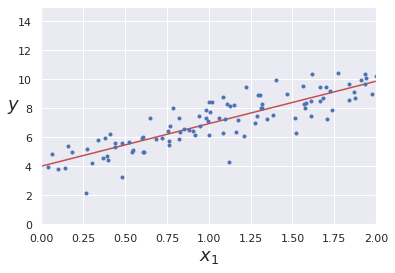

In [ ]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [ ]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history


In [ ]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Theta0:          3.748,
Theta1:          3.147
Final cost/MSE:  4340.404


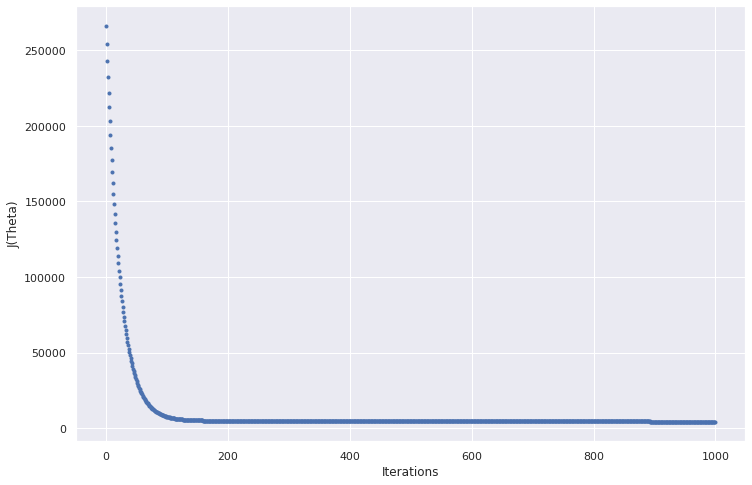

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

##Question 14 : Batch Gradient Descent

In [ ]:
def bgDescent(x,y,lr,it):
    x = np.array(x)
    ones = np.ones(shape=(x.shape[0],1))
    x = np.concatenate((ones, x), axis=1)
    y = np.array(y)
    W = np.zeros(shape=(x.shape[1],1))
    all_W = []
    for i in range(it):
        y_p = x @ W
        dW = np.dot(x.T, y_p - y)
        W = W - lr * dW
    all_W.append(W)
    return all_W

##Question 15 : Stochastic Gradient Descent

In [ ]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [ ]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.904,
Theta1:          2.919
Final cost/MSE:  56.189


## Question 16 : MiniBatch Gradient Descent

In [ ]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [ ]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.910,
Theta1:          3.011
Final cost/MSE:  854.345


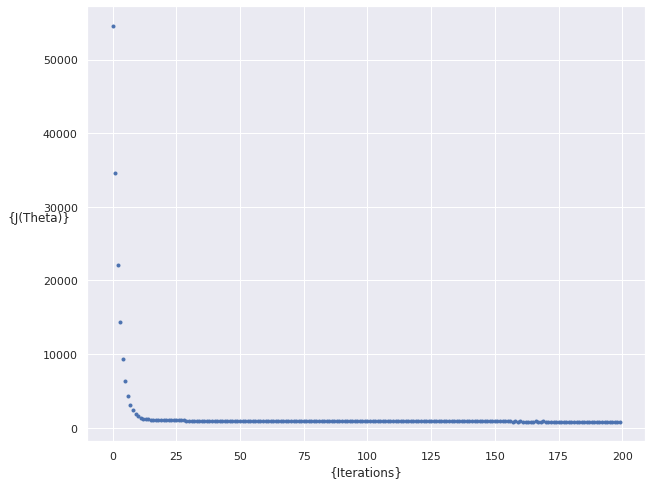

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

## Question 17: scipy.optimize.minimize

In [ ]:
from scipy.optimize import minimize, rosen, rosen_der

In [ ]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='TNC', jac=rosen_der, tol=1e-6, options ={'maxiter' : 400})
res.x
array([ 1.,  1.,  1.,  1.,  1.])

array([1., 1., 1., 1., 1.])

Second Attempt

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [ ]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [ ]:
print(res.x)

[1. 1. 1. 1. 1.]


In [ ]:
def rosen_with_args(x, a, b):
    """The Rosenbrock function with additional arguments"""
    return sum(a*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0) + b

In [ ]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen_with_args, x0, method='nelder-mead',
               args=(0.5, 1.), options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 319
         Function evaluations: 525


In [ ]:
print(res.x)

[1.         1.         1.         1.         0.99999999]


##Question 18

In [ ]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [ ]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
def predictU(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class[0])

In [ ]:
def predict2(X, theta, threshold = 0.5):
 
 a = h(theta, X)
 a [a >= threshold] = 1
 a [a < threshold]  = 0
 return a

In [ ]:
#predictU(np.array[24.0,30.0,12,0,2,1])

## Question 19: